In [1]:
%autosave 0
import pandas as pd
import glob
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import date, timedelta
import shutil

from sklearn.metrics import mean_absolute_error, mean_squared_error

Autosave disabled


In [2]:
path = r'C:\Users\utilisateur\0-DataScience\Formation-P3\Covid-19\AzureSC\Rapport'
all_files = glob.glob(path + "/*.csv")

li = []

for filename in all_files:
    df = pd.read_csv(filename, index_col=0, header=0)
    li.append(df)
    os.unlink(filename)

frame = pd.concat(li, axis=0, ignore_index=True)
frame

,date,country,total_cases_predict,total_cases_real,total_deaths_predict,total_deaths_real,error_abs_cases,error_abs_deaths
0,2020-03-29,France,37972.0,37575.0,2517.0,2314.0,397.0,203.0
1,2020-03-29,China,82472.0,82342.0,3304.0,3306.0,130.0,-2.0
2,2020-03-29,Italy,93505.0,92472.0,10092.0,10023.0,1033.0,69.0
3,2020-03-29,Spain,74605.0,72248.0,5565.0,5690.0,2357.0,-125.0
4,2020-03-29,United States,128133.0,124665.0,2201.0,2191.0,3468.0,10.0
...,...,...,...,...,...,...,...,...
1457,2020-08-29,United Kingdom,331513.0,331644.0,41526.0,41486.0,-131.0,40.0
1458,2020-08-29,Germany,240853.0,240986.0,9298.0,9289.0,-133.0,9.0
1459,2020-08-29,Iran,370340.0,369911.0,21332.0,21249.0,429.0,83.0
1460,2020-08-29,Turkey,265106.0,265515.0,6226.0,6245.0,-409.0,-19.0


In [3]:
def showMetricsGeneral(subject):
    print(f"-- Global performances for {subject} --")
    MAPE =mean_absolute_error(frame[f'total_{subject}_real'],frame[f'total_{subject}_predict']) 
    print("MAPE = ",MAPE)
    RMSE = mean_squared_error(frame[f'total_{subject}_real'],frame[f'total_{subject}_predict'], squared=False)
    print("RMSE = ",RMSE)

In [4]:
showMetricsGeneral("cases")

-- Global performances for cases --
MAPE =  7503.679206566348
RMSE =  29669.115086588004


In [5]:
showMetricsGeneral("deaths")

-- Global performances for deaths --
MAPE =  297.13269493844047
RMSE =  728.745206449684


In [6]:
def visFollow(country,subject):
    df = frame[frame['country'].isin([f"{country}"])]
    list_value_predict = df[f"total_{subject}_predict"]
    list_value_real = df[f"total_{subject}_real"]
    
    print(f"-- {country} performances for {subject} --")
    MAPE =mean_absolute_error(list_value_real,list_value_predict) 
    print("MAE = ",MAPE)
    RMSE = mean_squared_error(list_value_real,list_value_predict, squared=False)
    print("RMSE = ",RMSE)
    
    this_graf = plt.plot(df["date"], list_value_predict, 'go--', 
                         linewidth=2, markersize=12,label=f'{subject} predict')
    this_graf = plt.plot(df["date"], list_value_real, color='red',
                         marker='o',linewidth=2, markersize=12,label=f'{subject} real')
    this_graf =plt.title(f"{country}")
    plt.legend()
    plt.xticks(rotation=70)
    return this_graf

def visMetrics(country):
    vv = frame[frame['country'].isin([f"{country}"])]
    plt.plot(vv["error_abs_cases"],marker='o',label="error_abs_cases",color='blue',markersize=12)
    plt.plot(vv["error_abs_deaths"],marker='o',label="error_abs_deaths",color='orange',markersize=12)
    plt.title("Abs error over time")
    plt.legend()

def visShow(country):
    f0 = plt.figure(figsize=(20,10))
#     ax1 = plt.subplot(1,2,1)
    v = visFollow(f"{country}","cases")
    f1 = plt.figure(figsize=(20,10))
#     ax2 = f1.add_subplot(1,2,2)
    v = visFollow(f"{country}","deaths")
    f2 = plt.figure(figsize=(20,10))
#     ax3 = f2.add_subplot(1,2,1)
    v = visMetrics(country)

-- World performances for cases --
MAE =  52196.80575539568
RMSE =  93105.64483207837
-- World performances for deaths --
MAE =  1648.3237410071943
RMSE =  2017.1330160196542


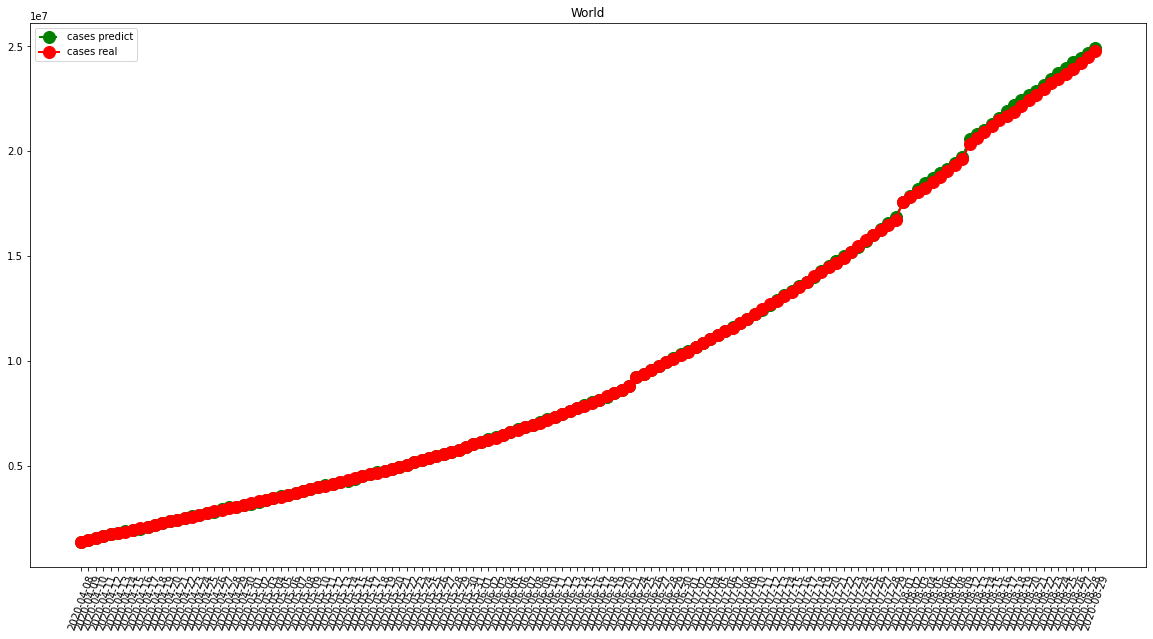

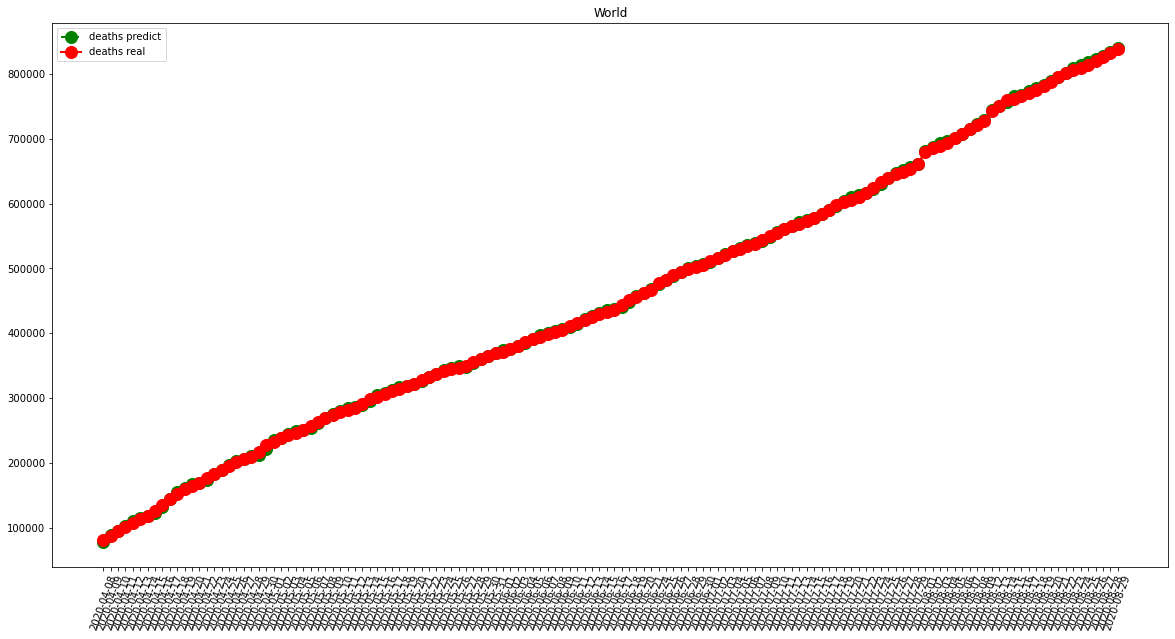

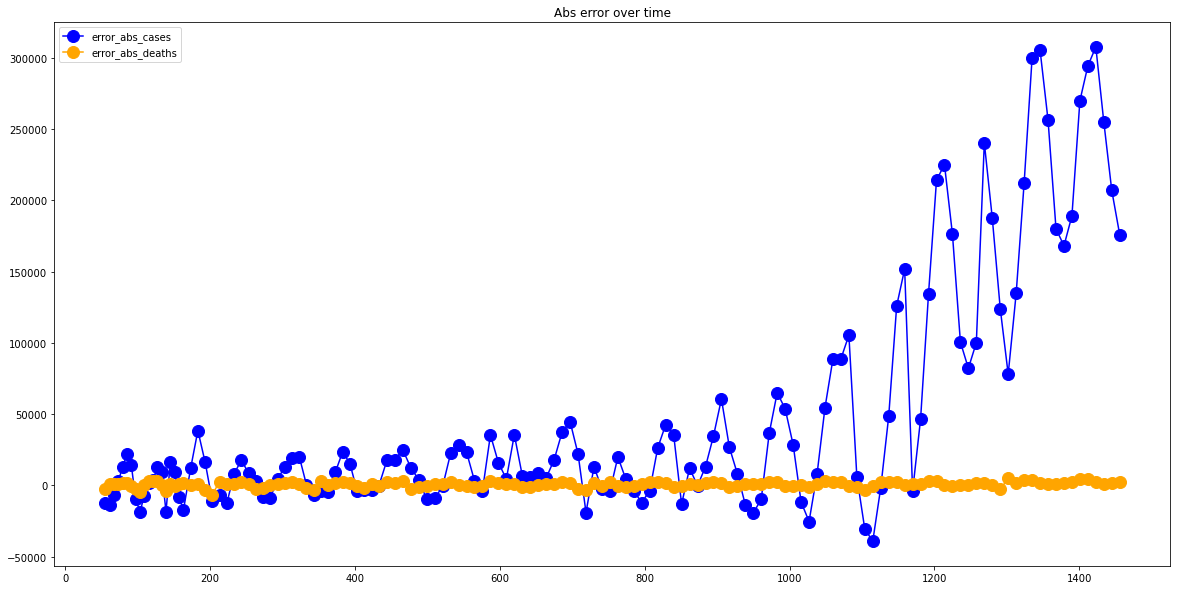

In [7]:
visShow("World")

-- France performances for cases --
MAE =  971.51677852349
RMSE =  1466.4084463557977
-- France performances for deaths --
MAE =  124.74496644295301
RMSE =  274.74819466158215


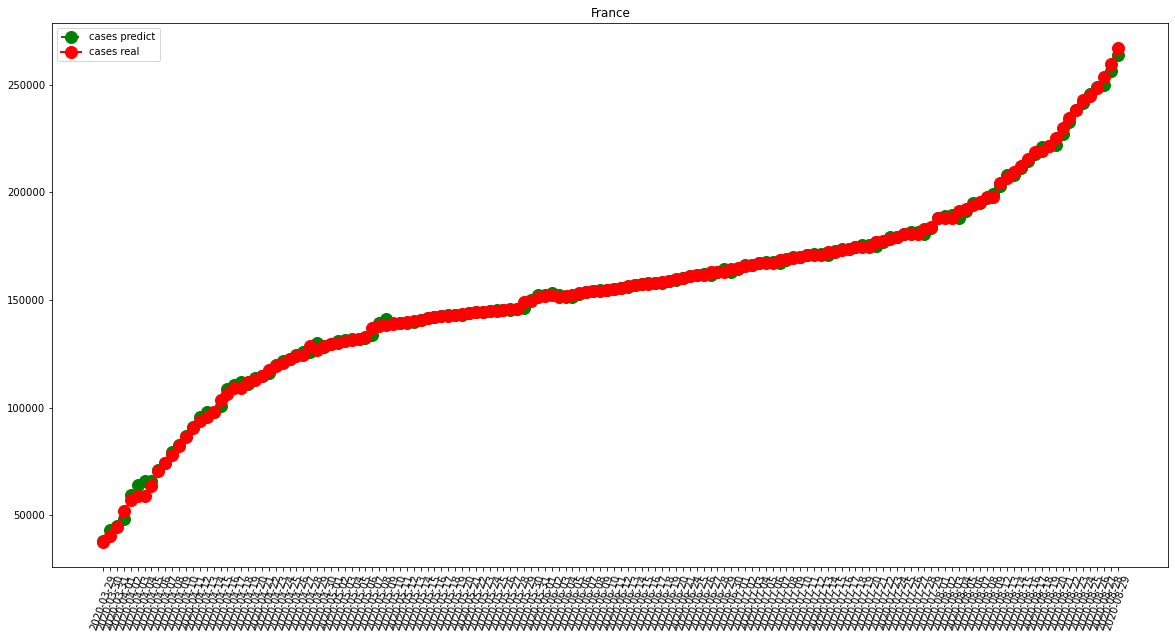

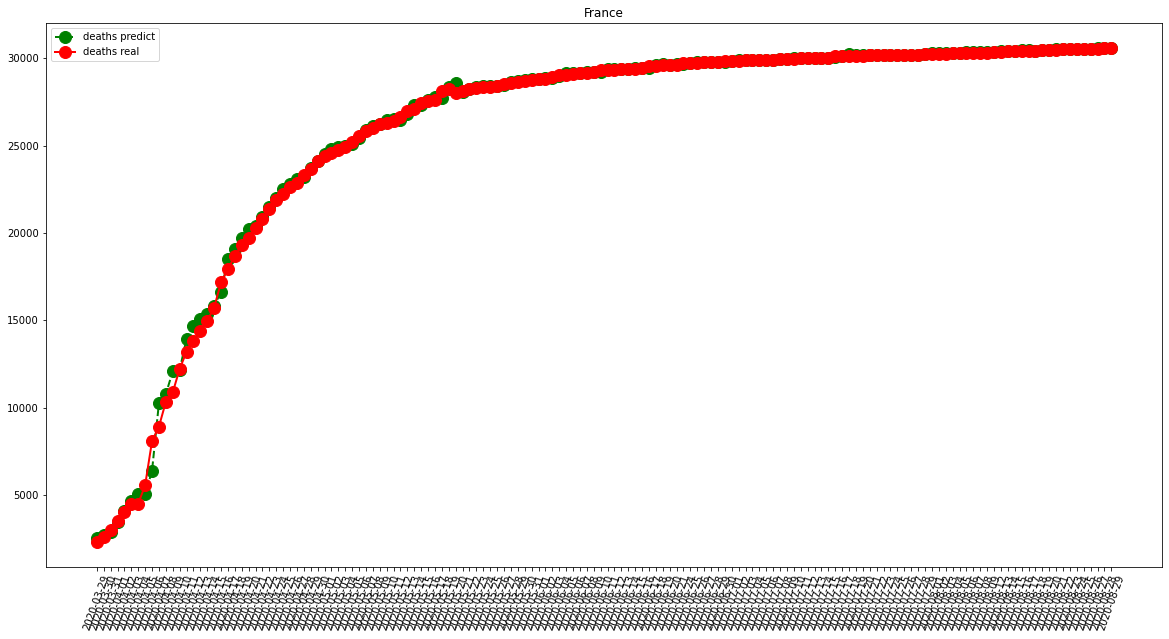

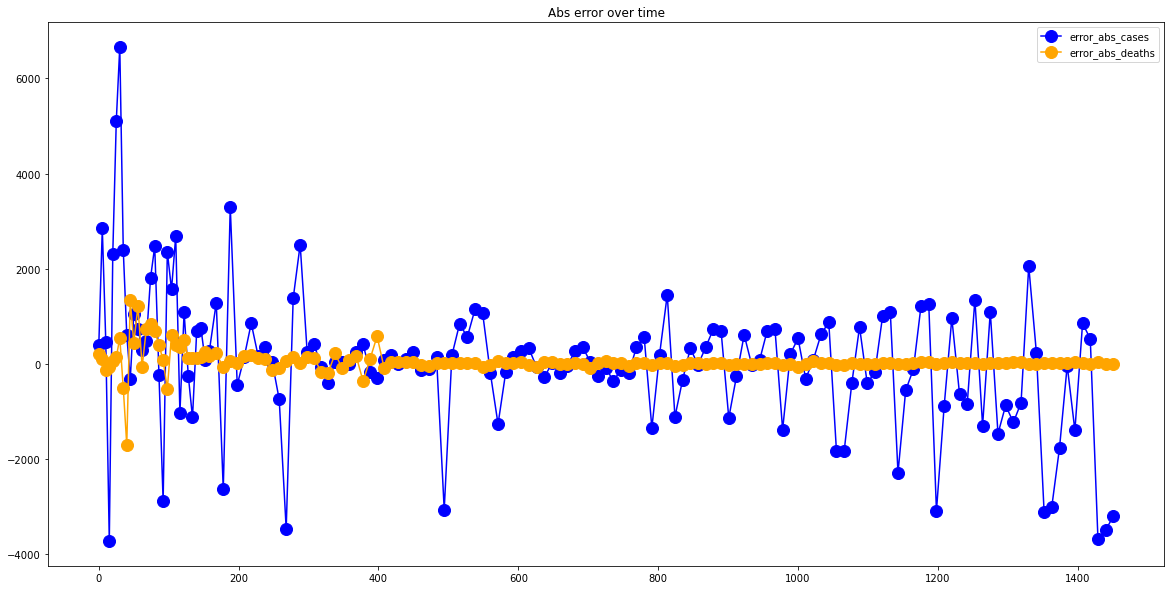

In [8]:
visShow("France")

-- Italy performances for cases --
MAE =  304.4429530201342
RMSE =  459.1867921305164
-- Italy performances for deaths --
MAE =  74.29530201342281
RMSE =  243.16625074906202


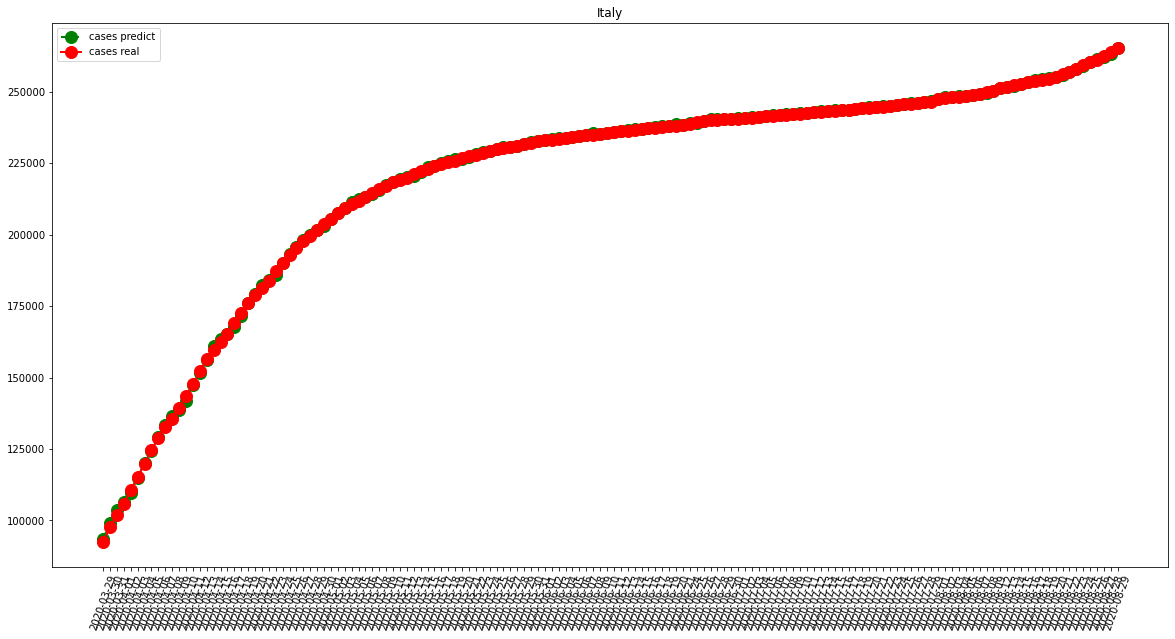

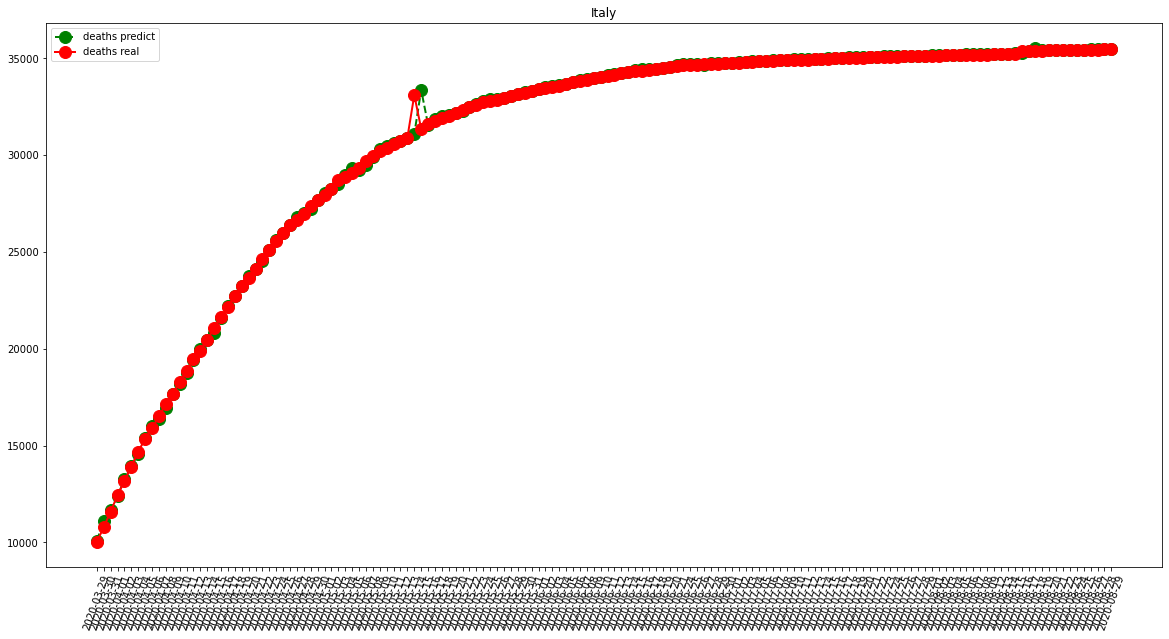

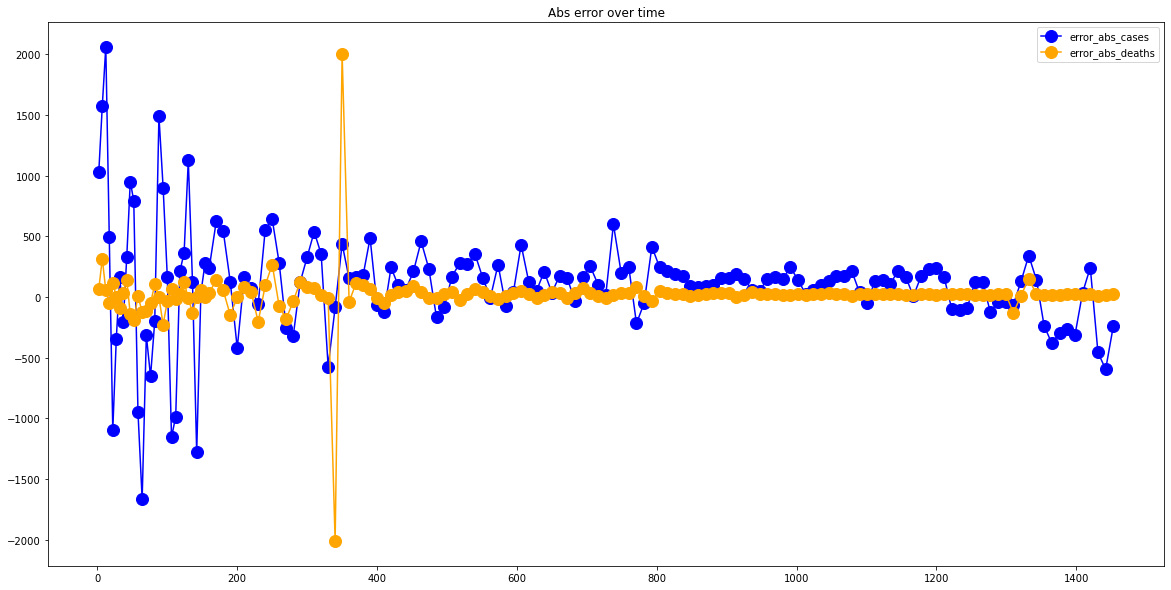

In [9]:
visShow("Italy")

-- Spain performances for cases --
MAE =  1732.7852348993288
RMSE =  3310.9015773703627
-- Spain performances for deaths --
MAE =  128.08053691275168
RMSE =  332.8415791011146


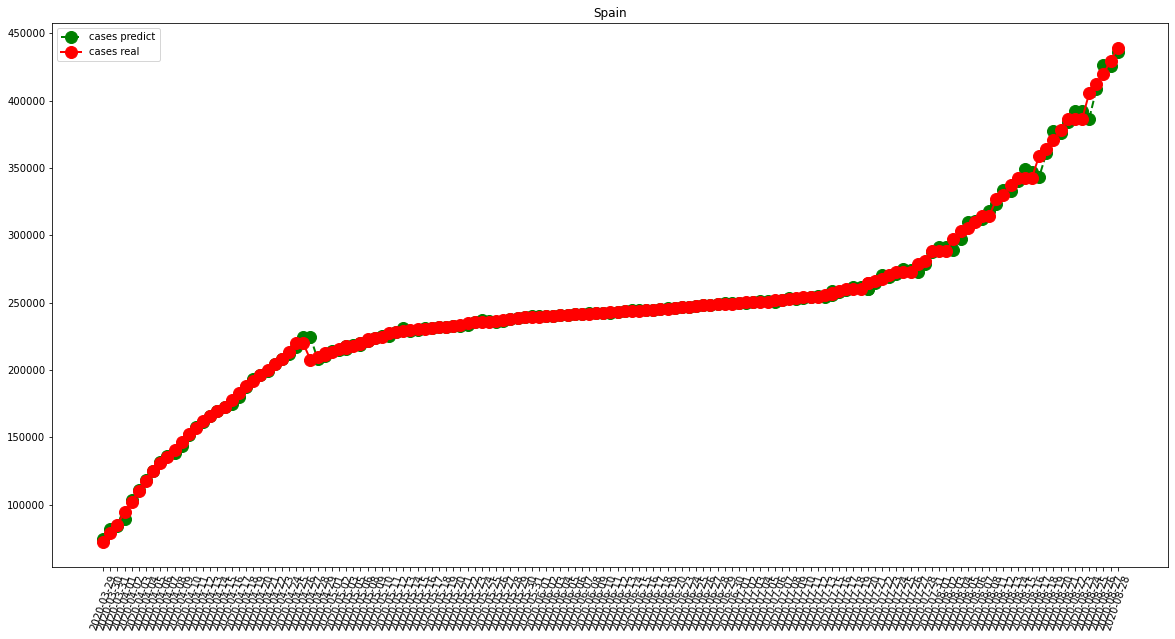

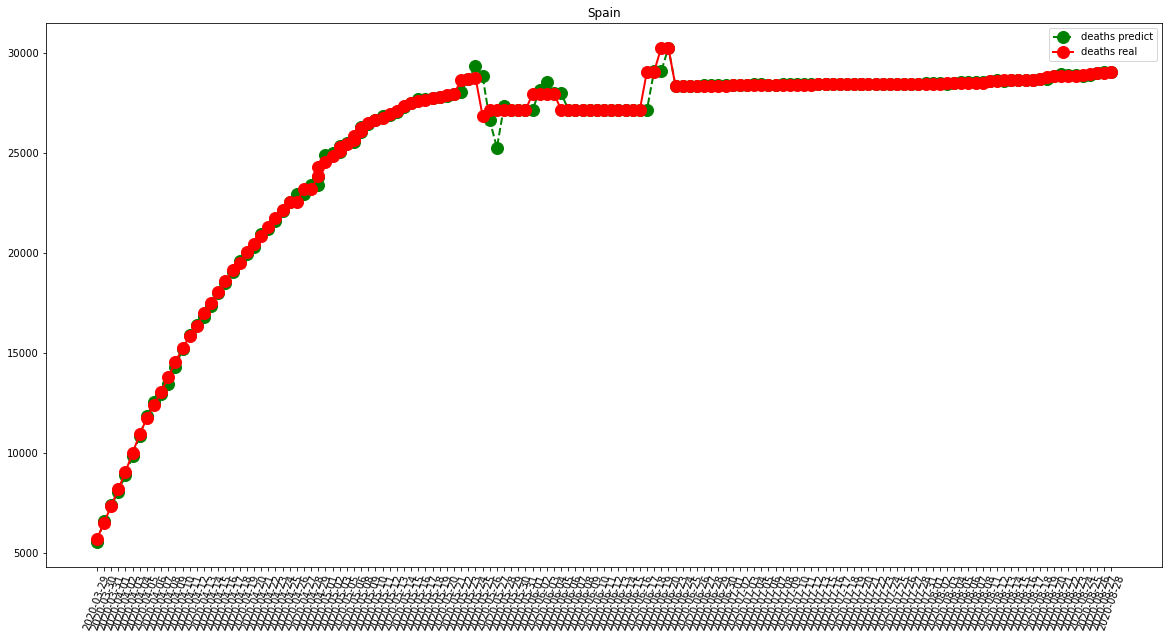

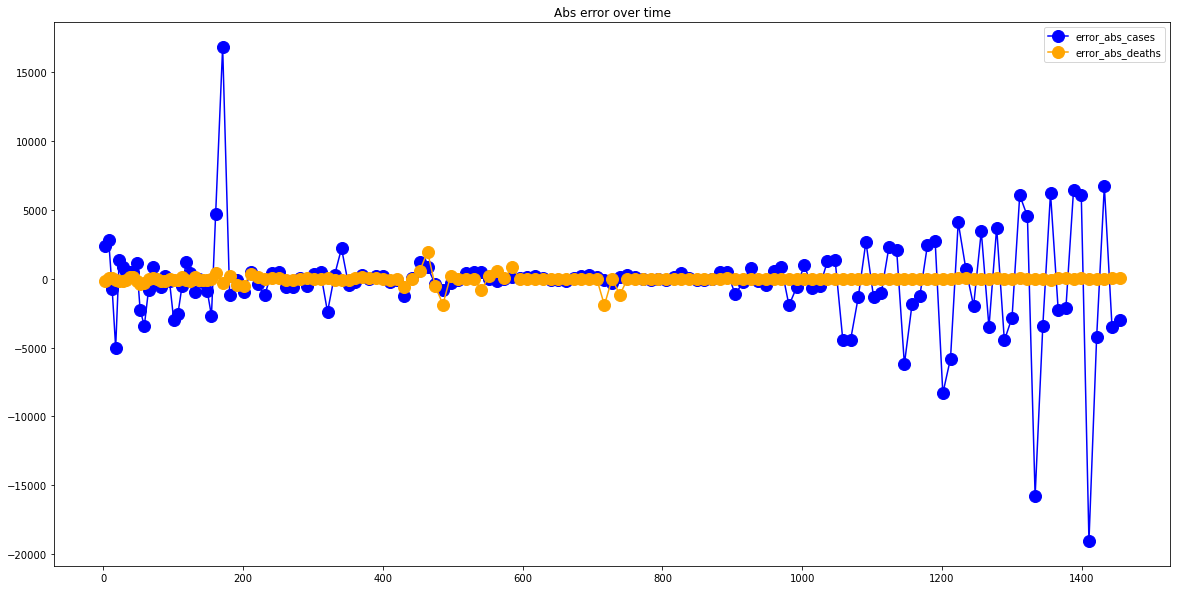

In [10]:
visShow("Spain")

-- United States performances for cases --
MAE =  11380.463087248321
RMSE =  17873.342667242498
-- United States performances for deaths --
MAE =  489.2013422818792
RMSE =  694.006580824842


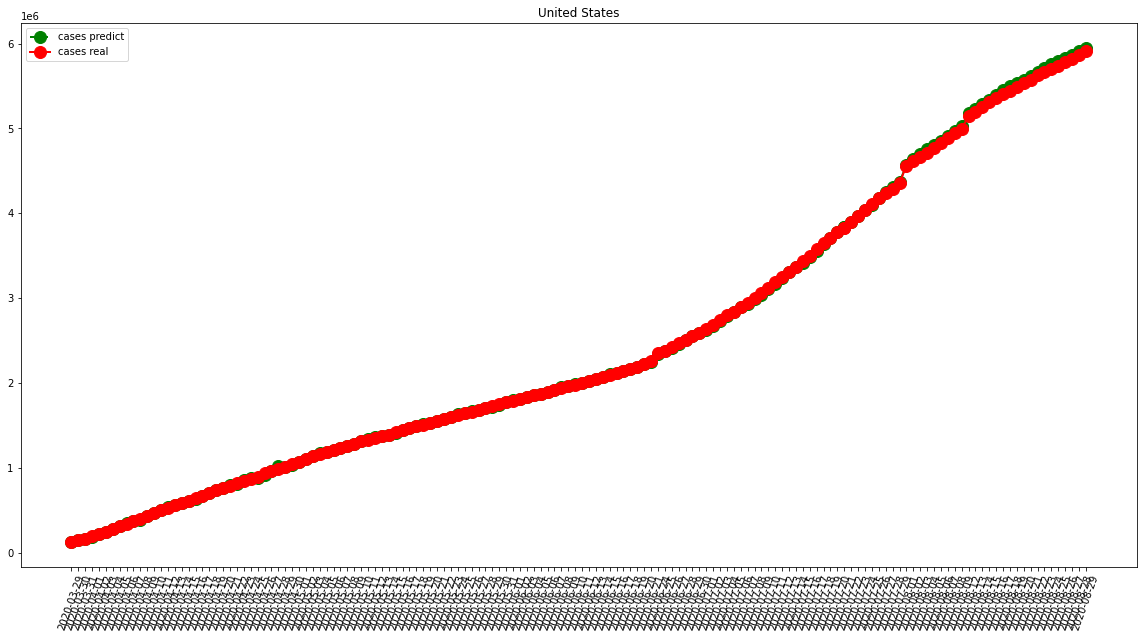

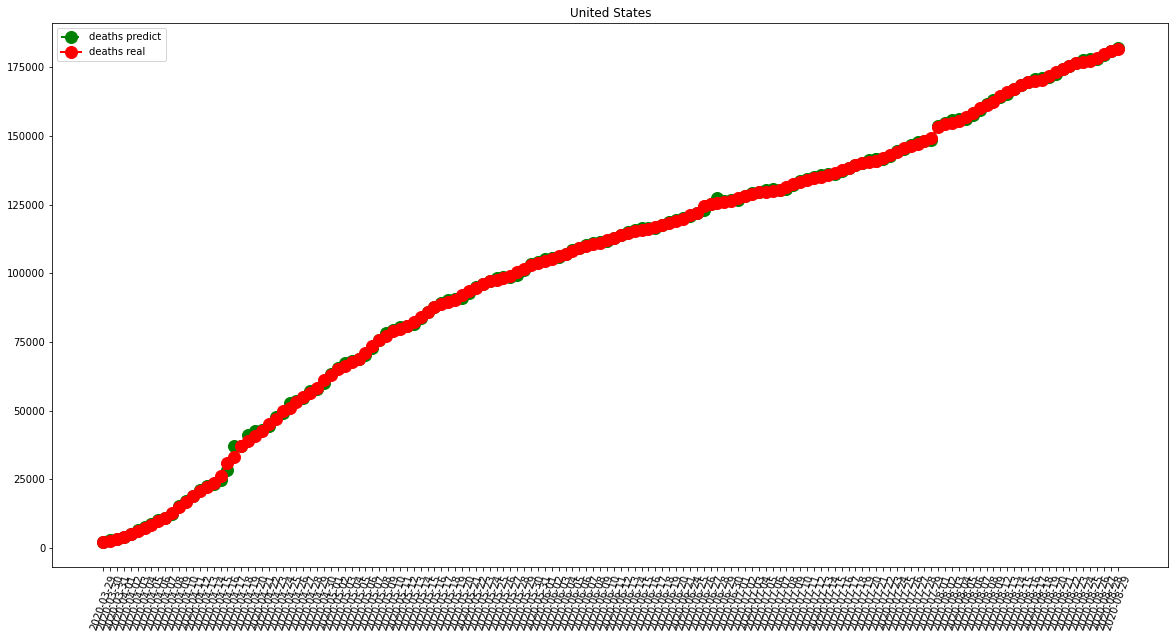

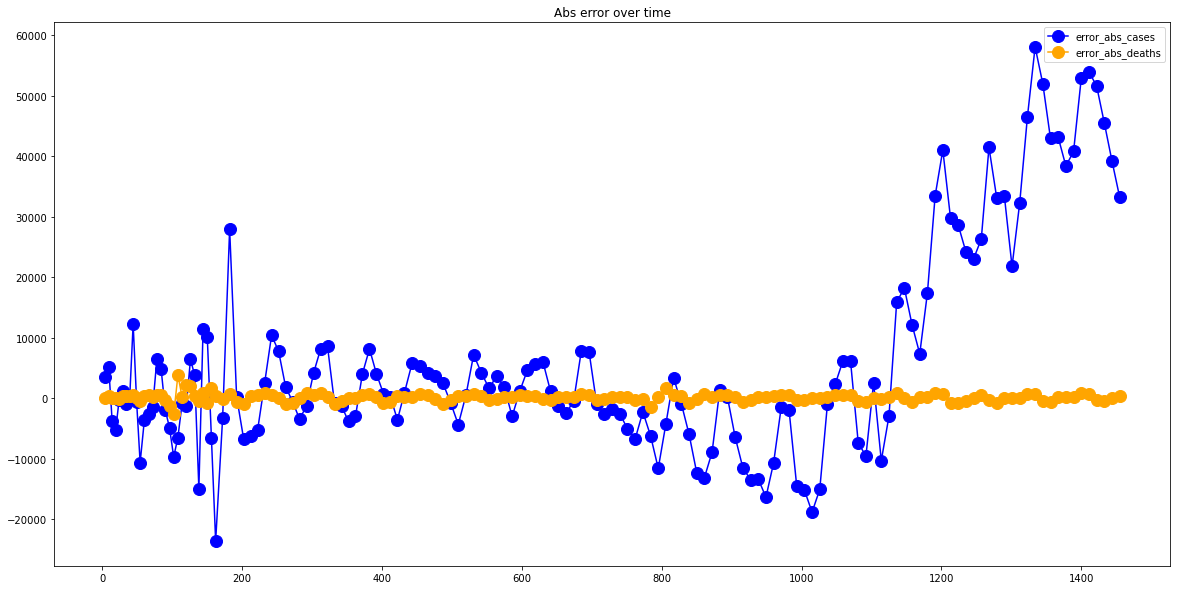

In [11]:
visShow("United States")

-- China performances for cases --
MAE =  66.97986577181209
RMSE =  97.74140652934953
-- China performances for deaths --
MAE =  27.879194630872483
RMSE =  128.63542989978833


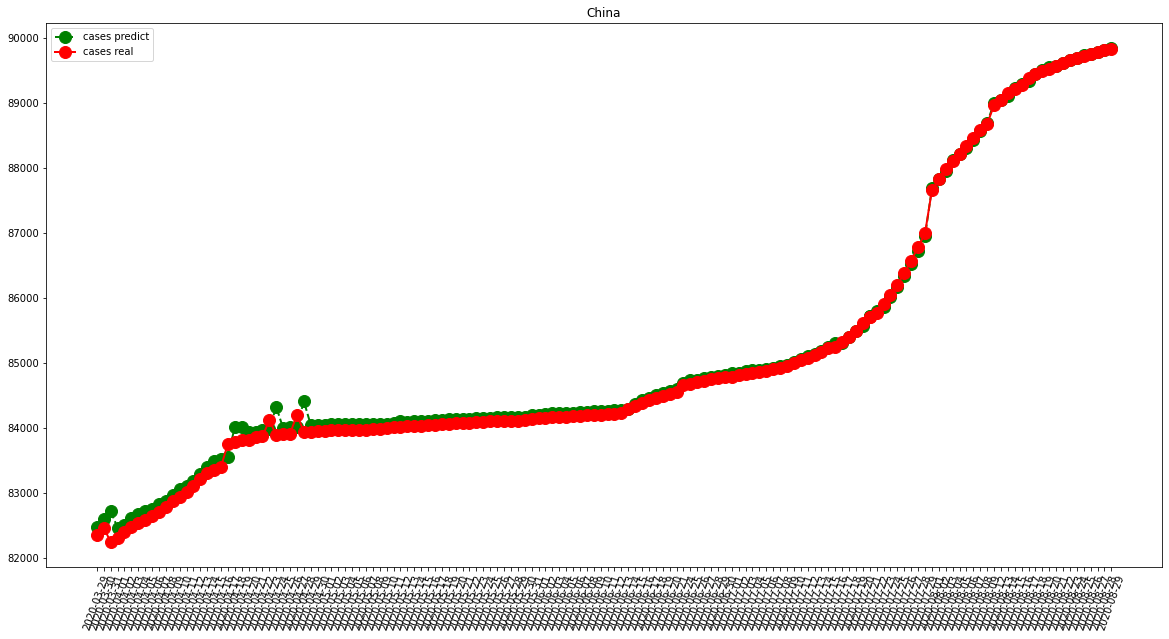

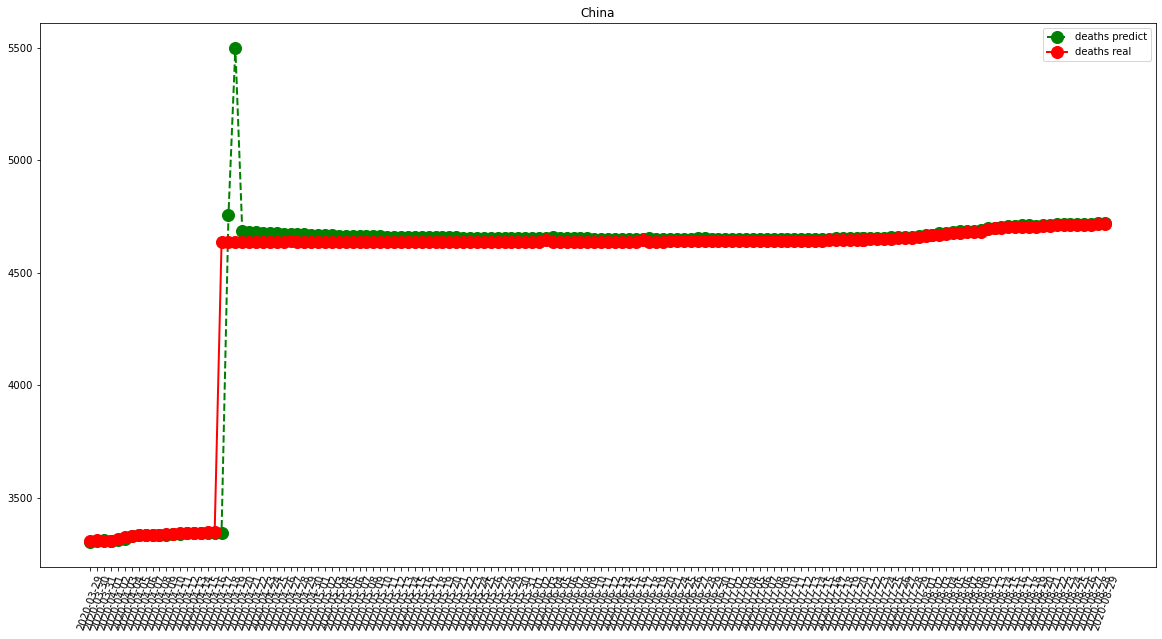

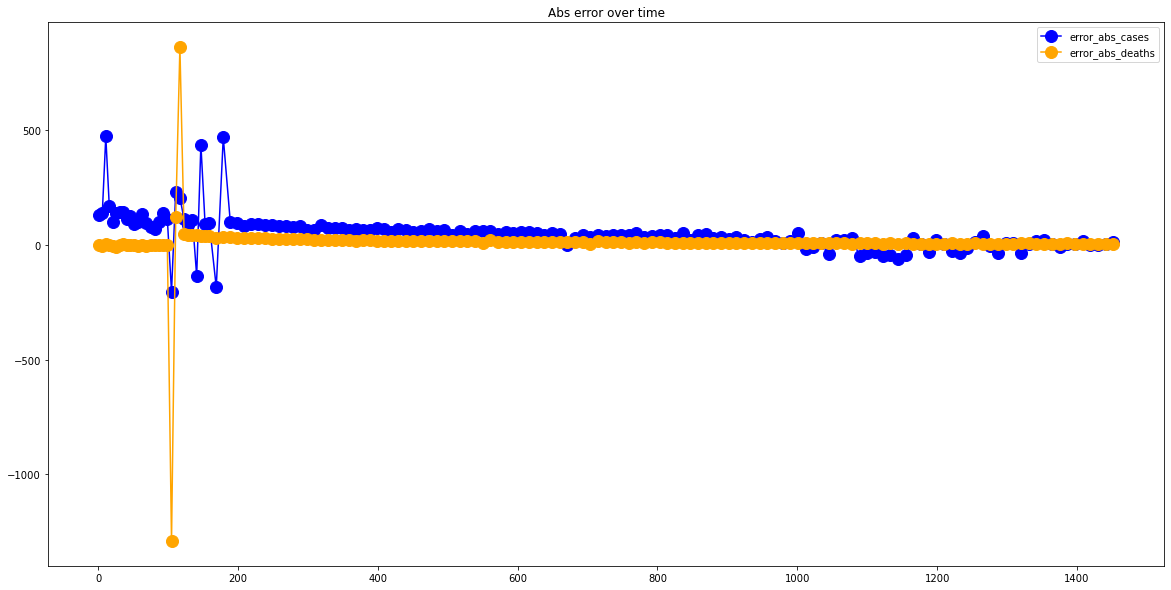

In [12]:
visShow("China")

-- United Kingdom performances for cases --
MAE =  1077.801652892562
RMSE =  3800.842836064497
-- United Kingdom performances for deaths --
MAE =  248.92561983471074
RMSE =  775.8031189282775


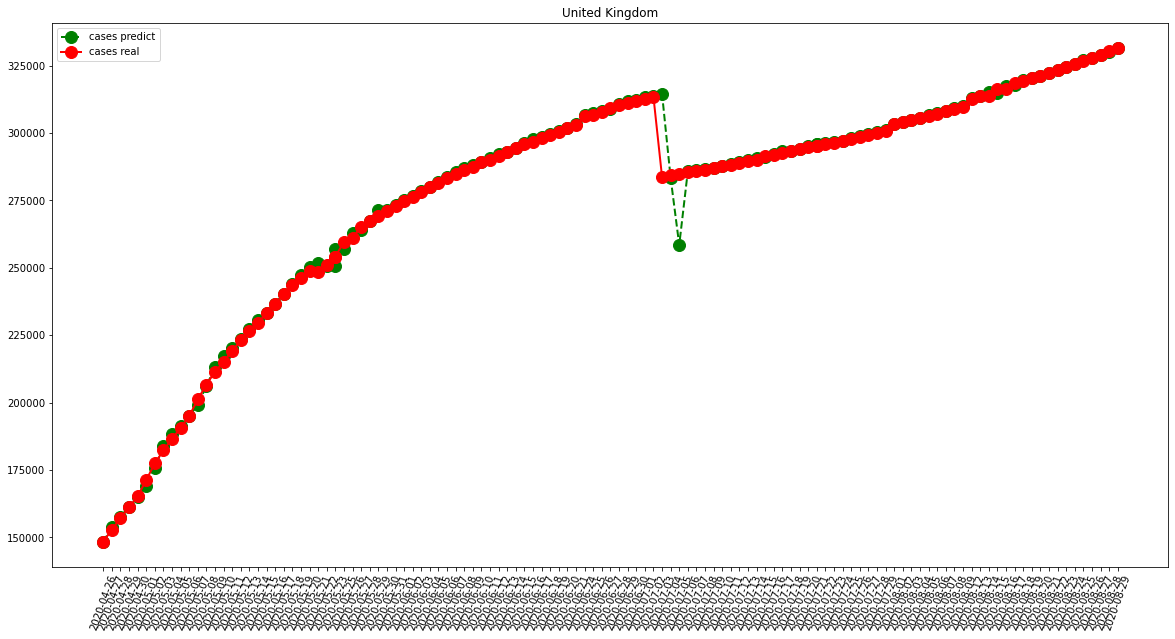

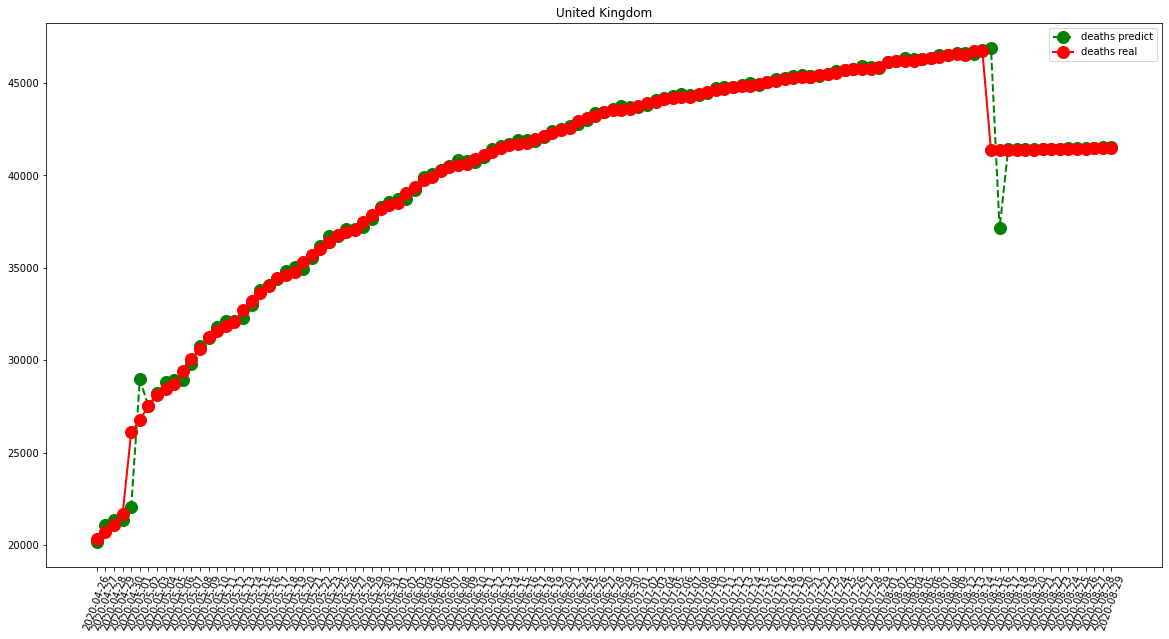

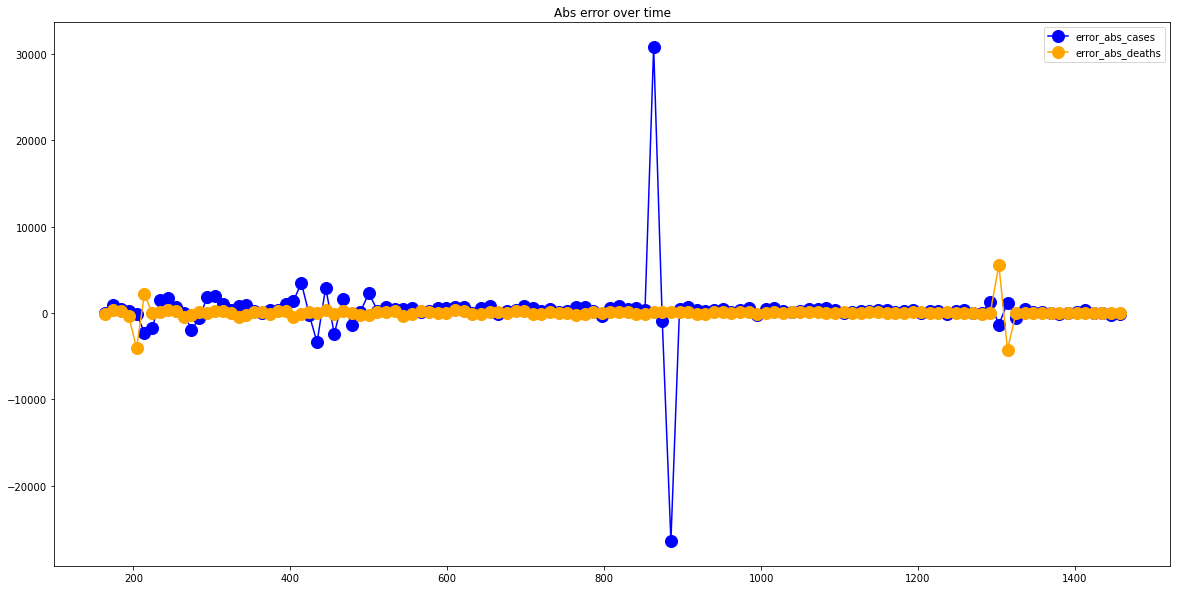

In [13]:
visShow("United Kingdom")

-- Germany performances for cases --
MAE =  395.0082644628099
RMSE =  583.5015137331912
-- Germany performances for deaths --
MAE =  21.446280991735538
RMSE =  39.944072471642585


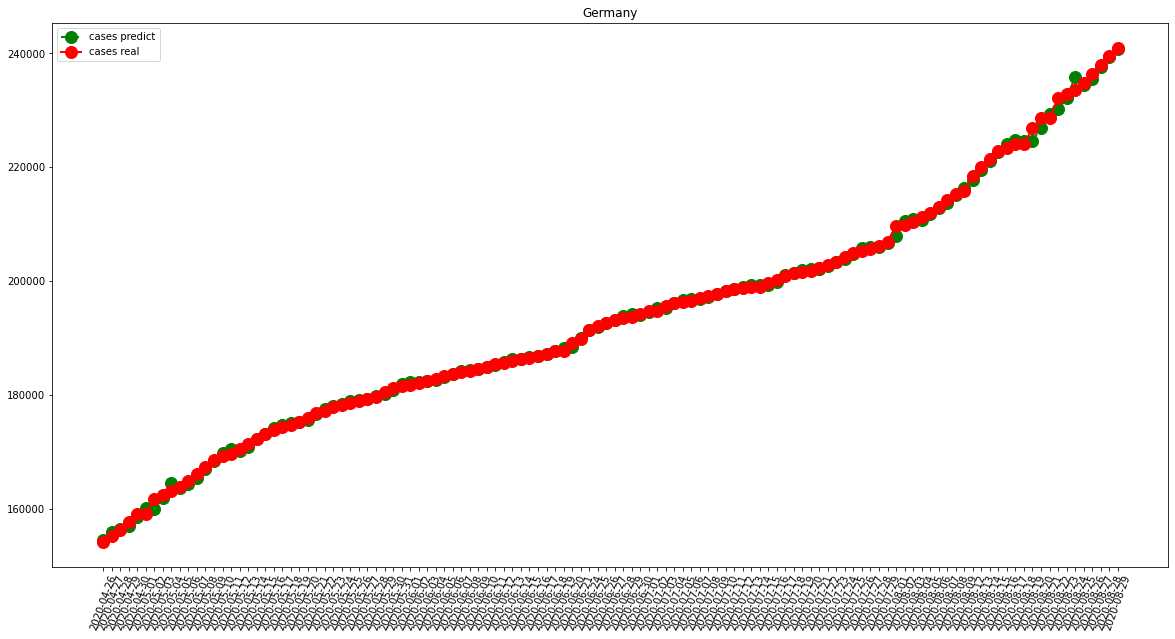

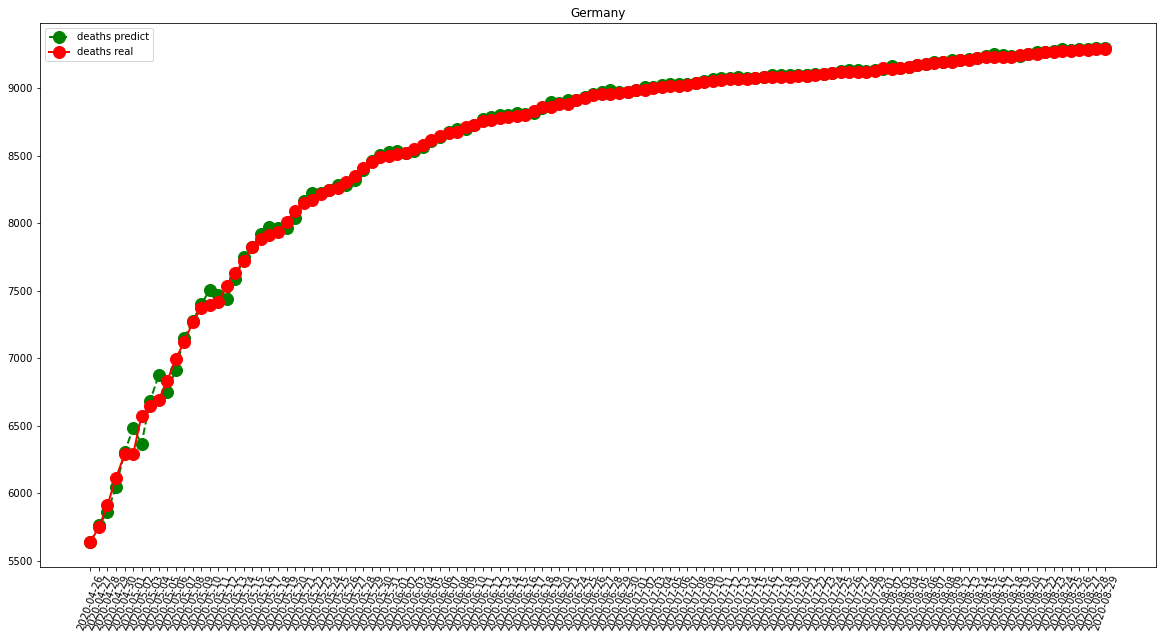

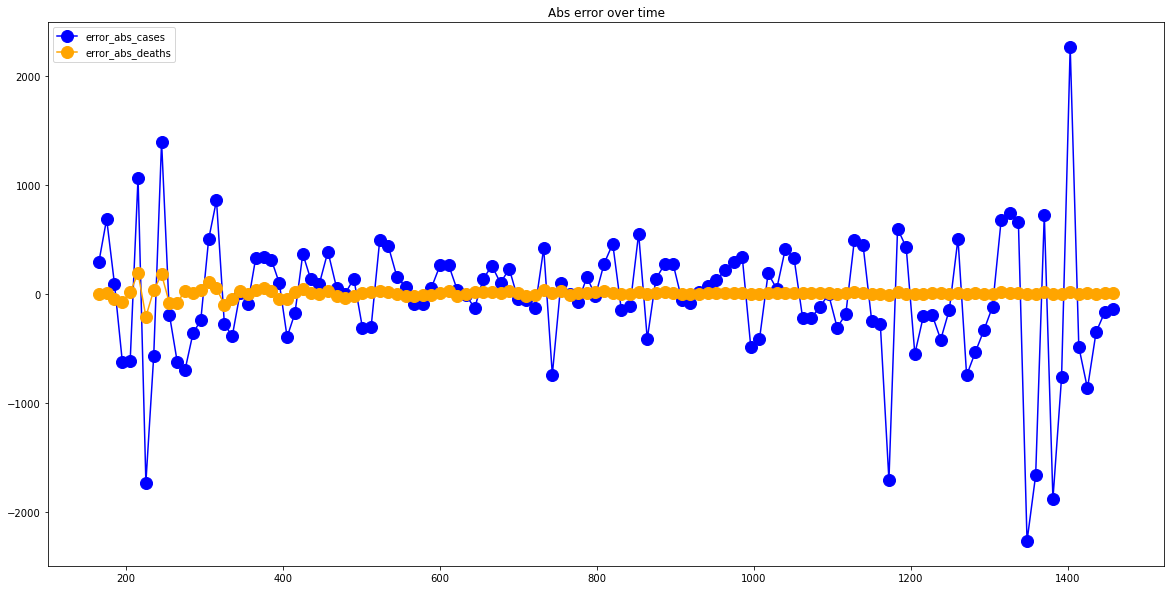

In [14]:
visShow("Germany")

-- Iran performances for cases --
MAE =  754.9504132231405
RMSE =  1122.9526862415842
-- Iran performances for deaths --
MAE =  41.98347107438016
RMSE =  79.76111026524018


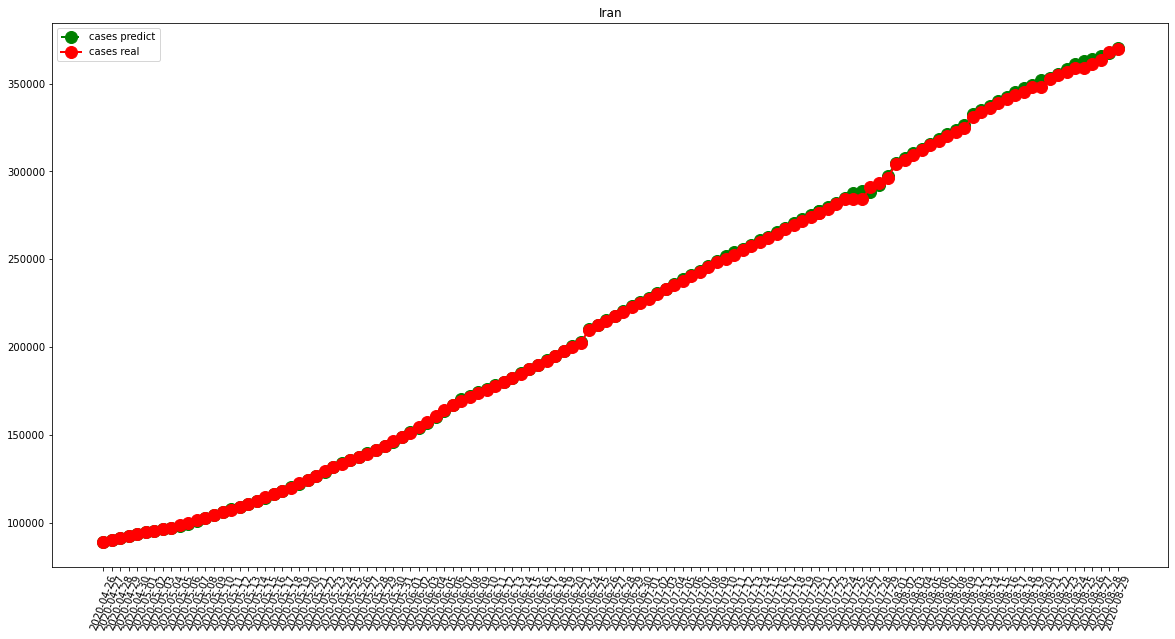

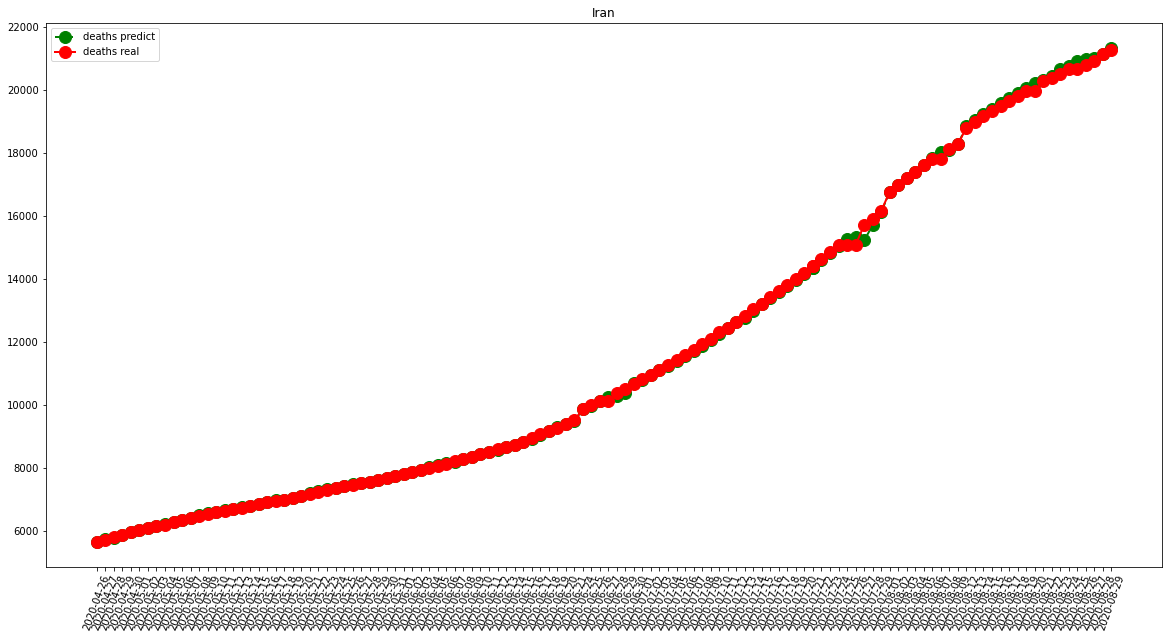

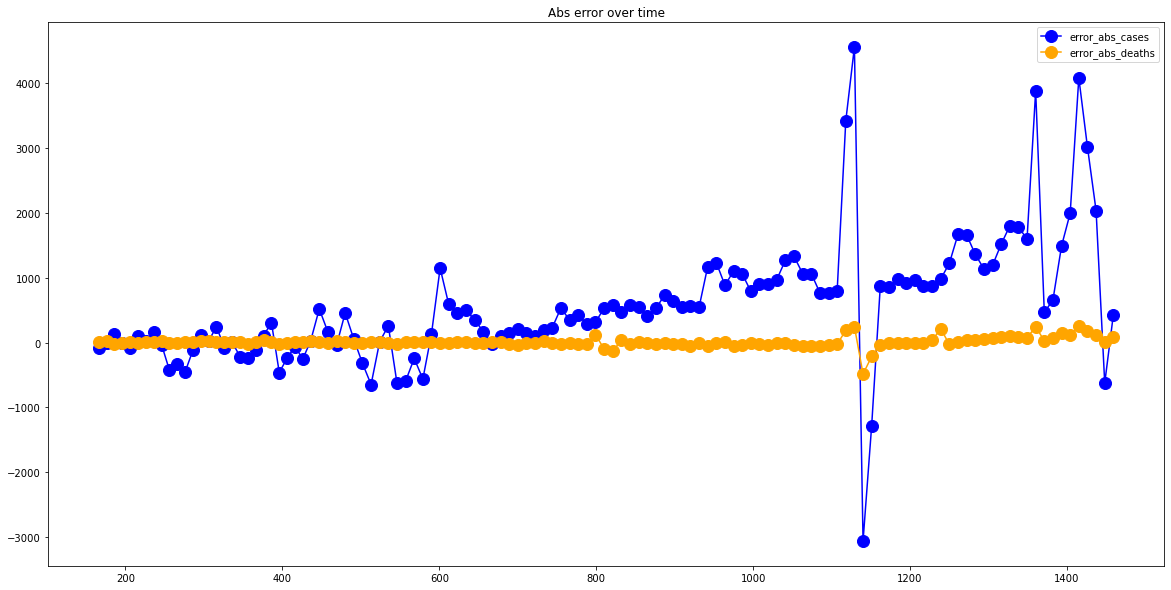

In [15]:
visShow("Iran")

-- Turkey performances for cases --
MAE =  200.17355371900825
RMSE =  327.12578772046623
-- Turkey performances for deaths --
MAE =  16.371900826446282
RMSE =  92.31185914519854


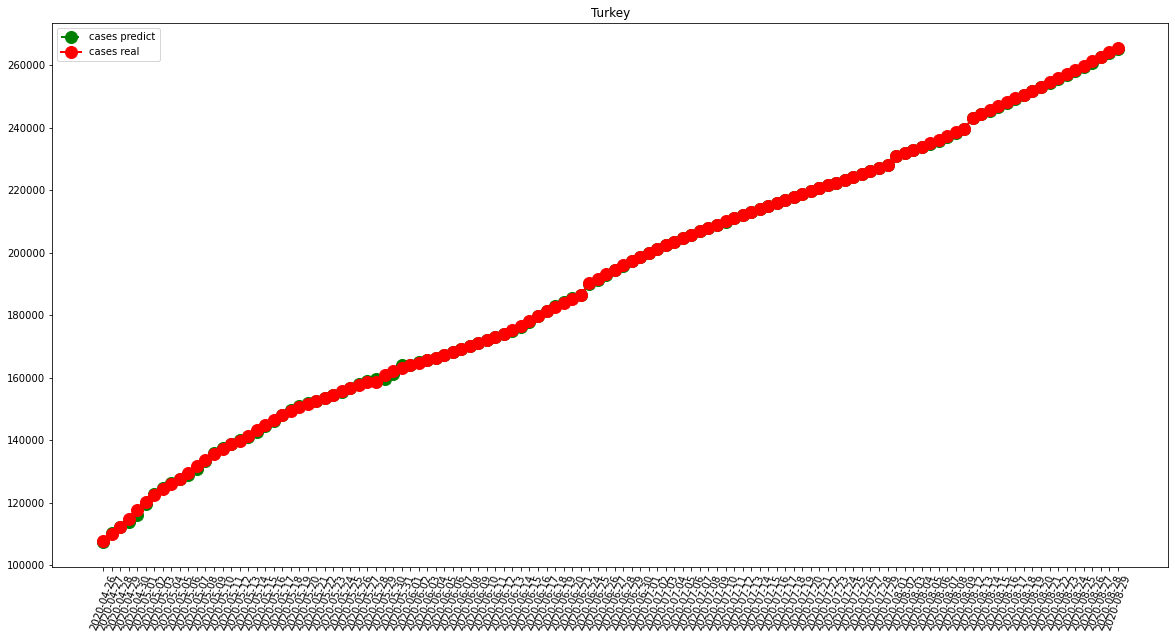

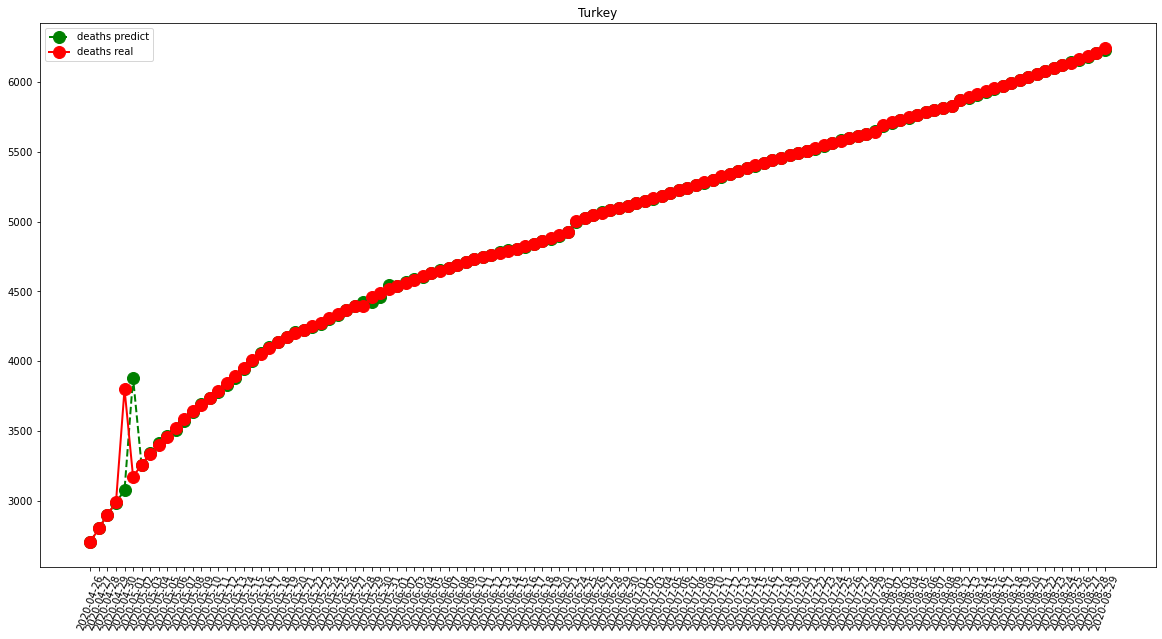

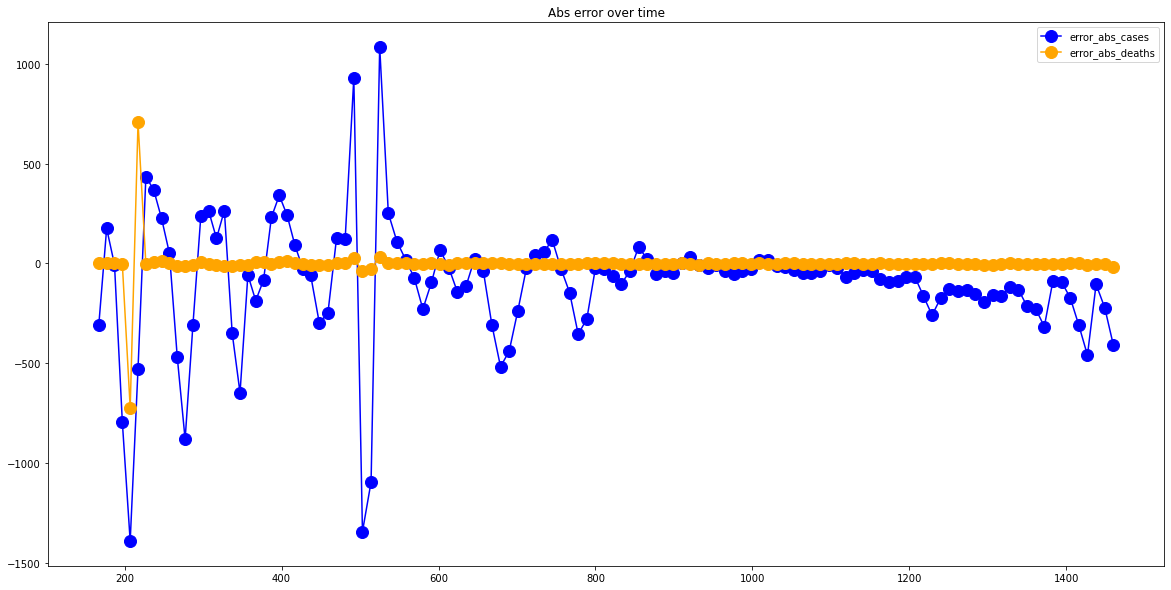

In [16]:
visShow("Turkey")

-- Brazil performances for cases --
MAE =  13481.606382978724
RMSE =  17998.407996087237
-- Brazil performances for deaths --
MAE =  422.6489361702128
RMSE =  518.1951801019101


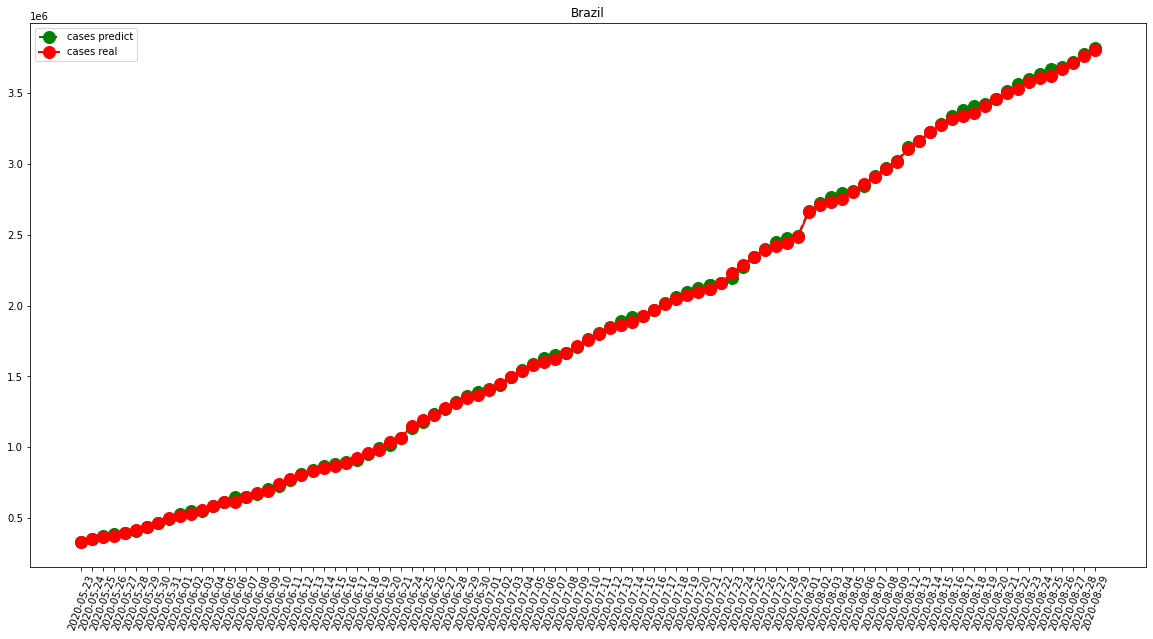

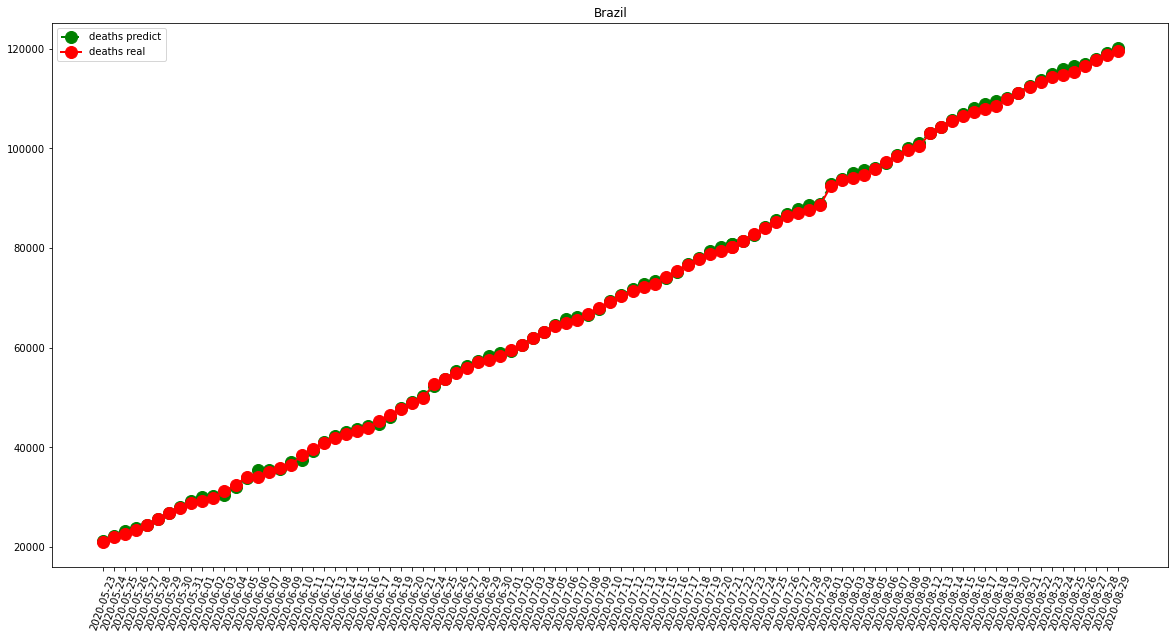

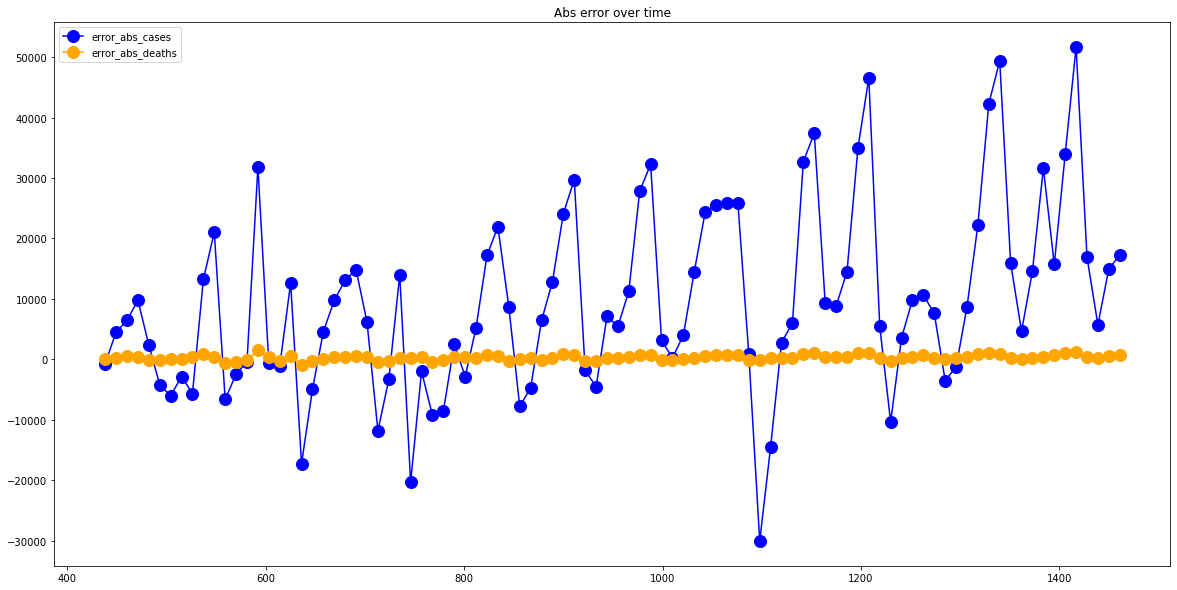

In [17]:
visShow("Brazil")

In [18]:
frame.to_csv(f"AzureSC\\Rapport\\Fullrap{date.today()}.csv")

The data's are sometimes corrected by the authorities, which causes deregulation of the curves and models (example China the 17-04, or France 05/06-04)